In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from lls import LLS

In [2]:
data = pd.read_csv('Inputs\HousePrice.csv')
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
data['Parking'].replace(['True', 'False'], [1, 0], inplace=True)
data['Elevator'].replace(['True', 'False'], [1, 0], inplace=True)
data['Warehouse'].replace(['True', 'False'], [1, 0], inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
data.drop('Address', axis=1, inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,True,True,True,1.850000e+09,61666.67
1,60,1,True,True,True,1.850000e+09,61666.67
2,79,2,True,True,True,5.500000e+08,18333.33
3,95,2,True,True,True,9.025000e+08,30083.33
4,123,2,True,True,True,7.000000e+09,233333.33


In [5]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.670137,0.199765,0.073080,0.047987,0.720990,0.720990
Room,0.670137,1.000000,0.279249,0.126244,0.183216,0.569476,0.569476
Parking,0.199765,0.279249,1.000000,0.428073,0.429527,0.192993,0.192993
Warehouse,0.073080,0.126244,0.428073,1.000000,0.204242,0.109675,0.109675
Elevator,0.047987,0.183216,0.429527,0.204242,1.000000,0.110417,0.110417
Price,0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000
Price(USD),0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000


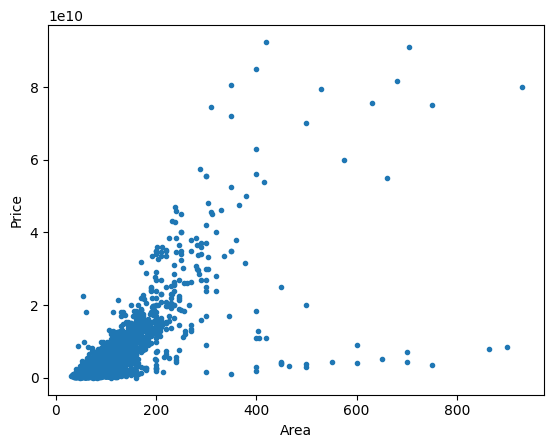

In [6]:
plt.scatter(data['Area'], data['Price'], marker='.')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [7]:
X = np.array(data[['Area']])
Y = np.array(data[['Price']])

print(X.shape)
print(Y.shape)

(3265, 1)
(3265, 1)


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2448, 1)
(2448, 1)
(817, 1)
(817, 1)


In [9]:
lls = LLS()
lls.fit(X_train, Y_train)

Y_pred = lls.predict(X_test)

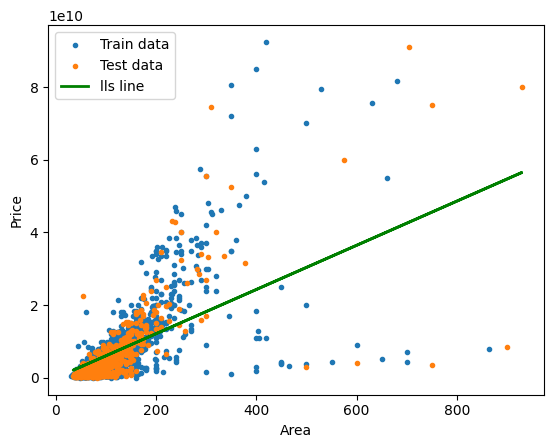

In [10]:
plt.scatter(X_train, Y_train, marker='.')
plt.scatter(X_test, Y_test, marker='.')
plt.plot(X_test, Y_pred, c='g', lw=2)
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(['Train data', 'Test data', 'lls line'], loc='upper left')
plt.show()

In [14]:
lls.evaluate(X_test, Y_test, 'mae')

3347053254.133478